In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from stargazer.stargazer import Stargazer
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import add_constant
import json
import geopandas as gpd
import plotly.graph_objects as go
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [105]:
df = pd.read_csv("data/df_final.csv")

In [106]:
df.tail()

,Unnamed: 0,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung
1990,1990,70,69581,1.0,51,K0467,103751.58,Thüringen
1991,1991,38,48301,1.0,33,K0122,64230.98,Niedersachsen
1992,1992,67,63547,1.0,41,K1045,103123.57,Berlin
1993,1993,37,32686,1.0,36,K1096,49215.87,Baden-Württemberg
1994,1994,55,71240,1.0,49,K0861,106132.59,Bayern


# 11. Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden)

In [107]:
selected_columns = ["Alter", "Einkommen", "Preis", "Zeit"]

new_df = df[selected_columns]

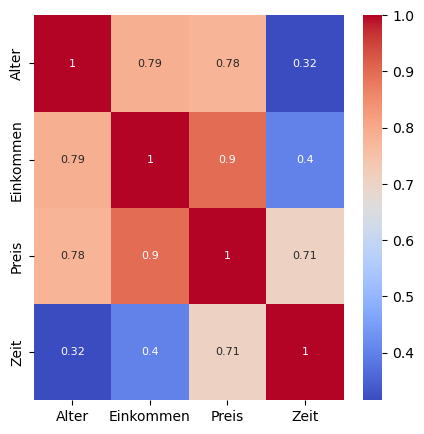

In [108]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    new_df.select_dtypes(np.number).corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 8}
);
plt.show()

# 12. Wie ist die Variable Zeit verteilt? (Kunden und Besucher zusammen)

C:\Users\s_goerer20\AppData\Local\Temp\ipykernel_5520\1193611392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Zeit"])


<Axes: xlabel='Zeit', ylabel='Density'>

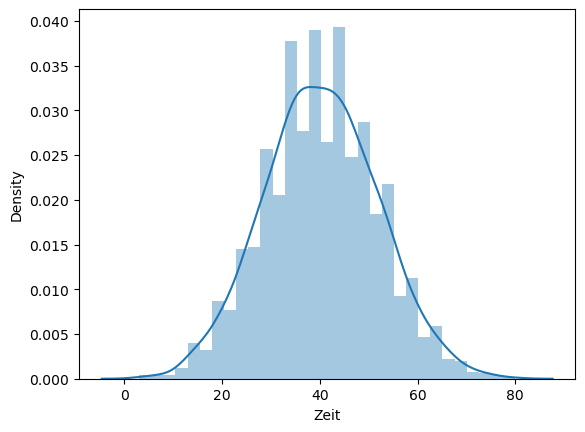

In [109]:
sns.distplot(df["Zeit"])

# 13. Wie viele Kunden haben keinen Kredit bei der Bank genommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu sammeln. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen, das höher als der Autopreis ist, keinen Bankkredit benötigten

In [110]:
Anzahl_Kreditnehmer = (df['Preis'] > df['Einkommen']).sum()
Anzahl_Kreditnehmer

1099

# 14. Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? Wählen Sie die geeigneten abhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [111]:
model = smf.ols("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
Stargazer([model])

In [112]:
model = sm.OLS.from_formula("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:45:07   Log-Likelihood:                -11749.
No. Observations:                1104   AIC:                         2.351e+04
Df Residuals:                    1100   BIC:                         2.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    909.5363   1390.088      0.654      0.513   -1817.988    3637.061
Alter        478.6882     39.476     12.126      0.000     401.232     556.145
Geschlecht  2140.9389    636.899      3.362      0.001     891.264    3390.614
Einkommen      1.0626      0.029     37.163      0.000       1.006       1.119
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.279
Skew:                           0.016   Prob(JB):                        0.527
Kurtosis:                       2.836   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 15. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro

In [113]:
from statsmodels.api import add_constant

In [114]:
X_predict = pd.DataFrame({
    'Alter': [32, 51],           
    'Geschlecht': [1, 1],
    'Einkommen': [30000, 54000] 
})

X_predict = add_constant(X_predict, has_constant='add')
X_predict

,const,Alter,Geschlecht,Einkommen
0,1.0,32,1,30000
1,1.0,51,1,54000


In [115]:
predicted_preis = model.predict(X_predict)
predicted_preis

0    50245.383433
1    84841.968072
dtype: float64

# 16. In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden? Tipp: Beta-Werte.

In [116]:
scaler_X = StandardScaler()

In [117]:
df[['Alter', 'Geschlecht', 'Einkommen']] = scaler_X.fit_transform(df[['Alter', 'Geschlecht', 'Einkommen']])

In [118]:
scaler_y = StandardScaler()

In [119]:
df['Preis'] = scaler_y.fit_transform(df[['Preis']])

In [120]:
try:
    model = sm.OLS.from_formula("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
    print(model.summary())
except Exception as e:
    print(f"Error: {str(e)}")

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:45:07   Log-Likelihood:                -593.99
No. Observations:                1104   AIC:                             1196.
Df Residuals:                    1100   BIC:                             1216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024      0.013      0.191      0.8

# 17. Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode. Tipp: Logistische Regression.

In [121]:
df['gekauft_1'] = df['Preis'].notna().astype(int)

In [122]:
df.tail()

,Unnamed: 0,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,gekauft_1
1990,1990,1.666406,0.640560,0.796183,51,K0467,0.604277,Thüringen,1
1991,1991,-1.020449,-0.660989,0.796183,33,K0122,-1.011910,Niedersachsen,1
1992,1992,1.414513,0.271502,0.796183,41,K1045,0.578595,Berlin,1
1993,1993,-1.104414,-1.616050,0.796183,36,K1096,-1.625950,Baden-Württemberg,1
1994,1994,0.406942,0.742030,0.796183,49,K0861,0.701648,Bayern,1


In [123]:
reg1_gekauft1 = smf.logit('gekauft_1 ~ Alter + Geschlecht + Einkommen + Zeit', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.579041
         Iterations 6


In [124]:
reg1_gekauft1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              gekauft_1   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.1577
Time:                        22:45:08   Log-Likelihood:                -1155.2
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.638e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8768      0.239    -16.220      0.000      -4.345      -3.408
Alter          0.2143      0.082      2.623      0.009       0.054       0.374
Geschlecht     0.1201      0.050      2.393      0.017       0.022       0.218
Einkommen     -0.6881      0.089     -7.753      0.000      -0.862      -0.514
Zeit           0.1022      0.006     17.530      0.000       0.091       0.114
==============================================================================
"""

In [125]:
Stargazer([reg1_gekauft1])

# 18. Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [126]:
Y_predict = pd.DataFrame({
    'Alter': [32, 51],           
    'Geschlecht': [1, 1],
    'Einkommen': [30000, 54000],
    "Zeit": [30, 45]
})

Y_predict = add_constant(Y_predict, has_constant='add')
Y_predict

,const,Alter,Geschlecht,Einkommen,Zeit
0,1.0,32,1,30000,30
1,1.0,51,1,54000,45


In [127]:
predicted_preis = reg1_gekauft1.predict(Y_predict)
(predicted_preis*100)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


0    0.0
1    0.0
dtype: float64

# 19. Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben.

In [128]:
geo_df = pd.read_csv("data/geo.txt", sep = "\t")
kunden_df["Einkommen"] = kunden_df["Einkommen"].astype("int")
geo_df["Niederlassung"] = geo_df["Niederlassung"].replace(["Berlin-Charlottenburg", "Berlin-Mitte", "BERLIN"], "Berlin")
data_df.loc[data_df['KundeNr'].isin(["K0701", "K1021"]), 'Einkommen'] = int(data_df['Einkommen'].median())

# 20. Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

In [129]:
Vorschlag 1: höchster abgescjlossener bildungsgrad
vorschlag 2: Anzahl der Kinder

SyntaxError: invalid syntax (2986260873.py, line 1)